## 판매데이터 정리
- 상품명 정리
- 전처리 전 unique한 제품명: 134개
- 전처리 목적: 프로모션에 따라 동일한 제품이더라도 다른 상품명으로 판매되어 정확한 집계가 불가함.
  1. 소분류: 55개
  2. 중분류: 22개
  3. 대분류: 11개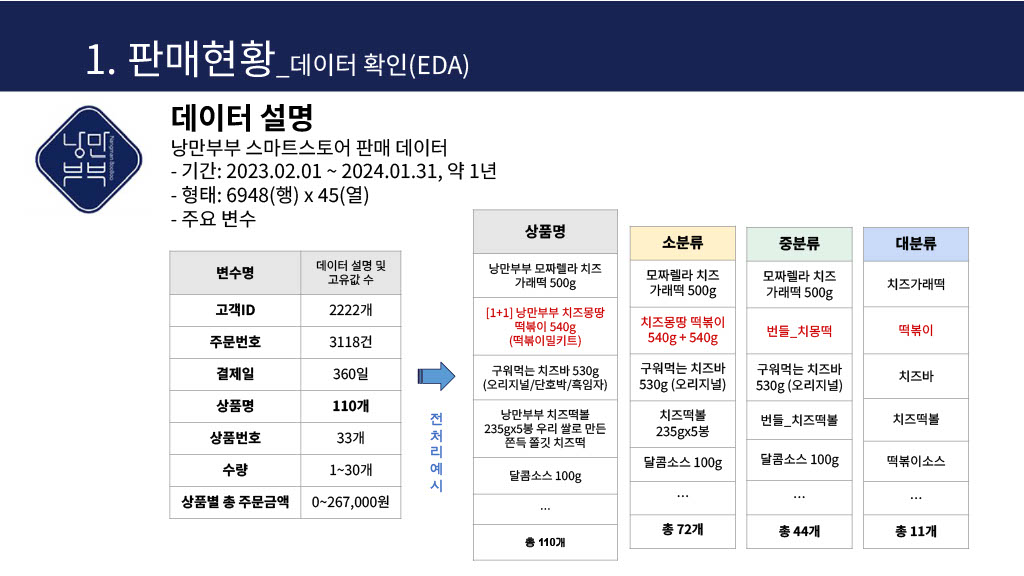

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
import pandas as pd
df_sale2 = pd.read_csv('/content/drive/MyDrive/낭만부부/analysis/sale.csv')

df_sale2 전체칼럼 추출

In [59]:
df_sale2.columns

Index(['상품주문번호', '주문번호', '구매확정일', '판매채널', '주문상태', '배송속성', '풀필먼트사(주문 기준)',
       '구매자명', '구매자ID', '수취인명', '발송처리일', '배송방법', '택배사', '송장번호', '배송완료일',
       '상품번호', '상품명', '상품종류', '반품안심케어', '옵션정보', '옵션관리코드', '수량', '상품가격', '옵션가격',
       '상품별 할인액', '판매자 부담 할인액', '상품별 총 주문금액', '판매자 상품코드', '판매자 내부코드1',
       '판매자 내부코드2', '배송비 묶음번호', '배송비 형태', '배송비 유형', '배송비 합계', '제주/도서 추가배송비',
       '배송비 할인액', '결제일', '결제수단', '결제위치', '수수료 과금구분', '수수료결제방식',
       '네이버페이 주문관리 수수료', '매출연동 수수료', '정산예정금액', '매출연동수수료 유입경로'],
      dtype='object')

특정 칼럼만 확인

In [60]:
df_sale2[["상품번호",	"상품명",	"상품종류",	"옵션정보"]].head()

,상품번호,상품명,상품종류,옵션정보
0,6911507810,낭만부부 치즈몽땅 떡볶이 540g (치즈떡+만두+소스 밀키트),조합형옵션상품,낭만부부치즈몽땅떡볶이: 치즈몽땅1팩
1,5892185888,낭만부부 꼬마가래떡 235g,조합형옵션상품,꼬마가래떡: 1봉(235g)
2,4788778377,낭만부부 햅쌀 떡국떡 1kg,단일상품,NaN
3,6911541023,구워먹는 치즈바 530g (오리지널/단호박/흑임자),조합형옵션상품,치즈바 선택: 구워먹는치즈바
4,4788783431,낭만부부 모짜렐라 치즈 가래떡 500g,조합형옵션상품,모짜렐라치즈가래떡 500g: 1봉


## 상품면 구분 칼럼 생성
1. 일단 "제품구분" 컬럼에 모든 값을 0으로 설정
2. 상품종류가 '단일상품'/ '추가구성상품'인 경우 기존 상품명대로 "제품구분" 값으로 반영
3. 이후 프로모션에 따라 변경 이력이 있는 상품명은 제품별로 구별해서 통일된 제품명으로 수정할 예정
4. 소분류/중분류/대분류 기준으로 카테고리 분류

In [61]:
df_sale2['제품구분'] = 0

In [62]:
df = df_sale2[["상품번호","제품구분",	"상품명",	"상품종류",	"옵션정보"]]
df.head()

,상품번호,제품구분,상품명,상품종류,옵션정보
0,6911507810,0,낭만부부 치즈몽땅 떡볶이 540g (치즈떡+만두+소스 밀키트),조합형옵션상품,낭만부부치즈몽땅떡볶이: 치즈몽땅1팩
1,5892185888,0,낭만부부 꼬마가래떡 235g,조합형옵션상품,꼬마가래떡: 1봉(235g)
2,4788778377,0,낭만부부 햅쌀 떡국떡 1kg,단일상품,NaN
3,6911541023,0,구워먹는 치즈바 530g (오리지널/단호박/흑임자),조합형옵션상품,치즈바 선택: 구워먹는치즈바
4,4788783431,0,낭만부부 모짜렐라 치즈 가래떡 500g,조합형옵션상품,모짜렐라치즈가래떡 500g: 1봉


In [63]:
# 상품종류가 '단일상품' 또는 '추가상품'인 경우 상품명을 제품구분에 넣어주는 함수 정의
def update_product_type(row):
    if row["상품종류"] == "단일상품" or row["상품종류"] == "추가구성상품":
        return row["상품명"]
    else:
        return row["제품구분"]

# apply 함수를 사용하여 새로운 제품구분 열을 생성
df_sale2["제품구분"] = df_sale2.apply(update_product_type, axis=1)

In [64]:
df_sale2[["상품번호","제품구분",	"상품명",	"상품종류",	"옵션정보"]].head()

,상품번호,제품구분,상품명,상품종류,옵션정보
0,6911507810,0,낭만부부 치즈몽땅 떡볶이 540g (치즈떡+만두+소스 밀키트),조합형옵션상품,낭만부부치즈몽땅떡볶이: 치즈몽땅1팩
1,5892185888,0,낭만부부 꼬마가래떡 235g,조합형옵션상품,꼬마가래떡: 1봉(235g)
2,4788778377,낭만부부 햅쌀 떡국떡 1kg,낭만부부 햅쌀 떡국떡 1kg,단일상품,NaN
3,6911541023,0,구워먹는 치즈바 530g (오리지널/단호박/흑임자),조합형옵션상품,치즈바 선택: 구워먹는치즈바
4,4788783431,0,낭만부부 모짜렐라 치즈 가래떡 500g,조합형옵션상품,모짜렐라치즈가래떡 500g: 1봉


### 조합협옵션상품 - 치즈바 추가

In [65]:
# 상품종류가 '단일상품' 또는 '추가상품'인 경우에는 상품명을 제품구분에 넣어줌
# 조합형옵션상품이면서 상품명이 '구워먹는 치즈바 530g'인 경우 상품명과 옵션정보를 조합하여 제품구분에 넣어줌
def update_product_type(row):
    if row["상품종류"] == "단일상품" or row["상품종류"] == "추가구성상품":
        return row["상품명"]
    elif row["상품종류"] == "조합형옵션상품" and ("구워먹는 치즈바 530g" in row["상품명"]
                                       or "구워먹는 냉동 모짜렐라치즈떡 흑임자 단호박" in row["상품명"]
                                       or "구워먹는 치즈바 3종 / 모짜렐라치즈떡 / 흑임자 단호박 오리지널" in row["상품명"]):
        option_info = row["옵션정보"].split(':')[1] if ":" in row["옵션정보"] else "" # ':'을 기준으로 분리하여 첫 번째 값을 가져오며, 옵션정보에 ':'가 없는 경우를 대비하여 처리
        return f"{row['상품명']} ({option_info})"
    else:
        return row["상품명"]

# apply 함수를 사용하여 새로운 제품구분 열을 생성
df_sale2["제품구분"] = df_sale2.apply(update_product_type, axis=1)


In [66]:
# 제품명 unique: 134 개
unique_count = df_sale2['제품구분'].nunique()
print(unique_count)

134


## 소분류
- 같은 제품이지만 상품 페이지별로 다르게 설정된 상품명
- 혹은, 행사기간동안 일시적으로 변경된 이력이 있는 상품명을 통일시키는 작업

### 소분류 1차 정리
- 156개 -> 52개

In [67]:
# '제품구분' 칼럼에서 '낭만부부'를 공백으로 대체
df_sale2['제품구분'] = df_sale2['제품구분'].str.replace('낭만부부', '')

# '달콤소스 100g'
sauce_sweet = ['달콤소스', '달콤소스100g', '달콤소스(100g)', '달콤소스(떡볶이용소스)100g']
df_sale2['제품구분'].replace(sauce_sweet, '달콤소스 100g', inplace=True)

# '매콤소스 100g'
sauce_hot = ['매콤소스', '매콤소스100g', '매콤소스(100g)', '매콤소스(떡볶이용소스)100g']
df_sale2['제품구분'].replace(sauce_hot, '매콤소스 100g', inplace=True)

# 불난마요소스 30g
sauce_dip = ['불난마요소스', '불난마요소스30g', '불난마요소스(30g)', '불난마요소스(찍먹소스)30g']
df_sale2['제품구분'].replace(sauce_dip, '불난마요소스 30g', inplace=True)

# 조청(30g)
sauce_honey = ['조청', '조청30g', '조청(30g)']
df_sale2['제품구분'].replace(sauce_honey, '조청 30g', inplace=True)

# 치즈몽땅 떡볶이 540g + 540g
mealkit_ch2 = ['[1+1]  치즈몽땅 떡볶이 540g (떡볶이밀키트) 1봉 + 1봉', '[1+1 할인]  치즈몽땅 떡볶이 540g (떡볶이밀키트) 1봉 + 1봉',
              '[1+1]  치즈몽땅 떡볶이 540g (떡볶이밀키트)', '[1+1]  치즈몽땅 떡볶이 540g (떡볶이밀키트)', '[1+1 할인]  치즈몽땅 떡볶이 540g (떡볶이밀키트)']
df_sale2['제품구분'].replace(mealkit_ch2, '치즈몽땅 떡볶이 540g + 540g', inplace=True)

#'치즈몽땅 떡볶이 540g'

mealkit_ch1 = [' 치즈몽땅 떡볶이 540g (치즈떡+만두+소스 밀키트)', ' 치즈몽땅 떡볶이 540g', ' 치즈몽땅 떡볶이 540g / 3봉 구매시 1봉 추가 증정',
               ' 치즈몽땅 떡볶이 540g / 2개 구매시 1개 추가 (11월11일, 12일)',' 어린이 간식 야식 밀키트 치즈몽땅 떡볶이 540g', '제품구분',
              ' 치즈몽땅 떡볶이 540g / 2봉 구매시 1봉 추가(10일부터 12일까지)', '치즈몽땅 떡볶이 540g  어린이 간식 야식 밀키트',
               ' 어린이 간식 야식 밀키트 치즈몽땅 떡볶이 540g', ' 치즈몽땅 떡볶이 540g (치즈떡+만두+소스 밀키트)',
               '치즈몽땅 떡볶이 540g  어린이 간식 야식 밀키트', ' 모짜렐라 치즈 가래떡 치즈바 떡볶이',
               ' 치즈몽땅 떡볶이 540g (치즈떡+만두+소스 밀키트)',' 모짜렐라 치즈 가래떡 치즈바 떡볶이',
               ' 어린이 간식 야식 밀키트 치즈몽땅 떡볶이 540g', '치즈몽땅 떡볶이 540g  어린이 간식 야식 밀키트',
               ' 모짜렐라 치즈 가래떡 치즈바 떡볶이']
df_sale2['제품구분'].replace(mealkit_ch1, '치즈몽땅 떡볶이 540g', inplace=True)


#'모짜렐라 치즈 가래떡 500g+500g'
cgt_500 = ['[1+1]  모짜렐라 치즈 가래떡 500g+500g',
           ' 모짜렐라 치즈 가래떡 500g+500g (찍먹소스 30g 2개 증정)',
           '[1+1 할인]  모짜렐라 치즈 가래떡 500g+500g',
           ' 모짜렐라 치즈 가래떡 500g/2개 구매시 1개 추가(11월 11일,12일)',
           ' 모짜렐라 치즈 가래떡 500g / 2봉 구매시 1봉 추가(10일부터 12일까지)',
           ' 모짜렐라 치즈 가래떡 500g+500g']

df_sale2['제품구분'].replace(cgt_500, '모짜렐라 치즈 가래떡 500g+500g', inplace=True)

# '모짜렐라 치즈 가래떡 500g'
cgt_500_1 = [' 모짜렐라 치즈 가래떡 500g','모짜렐라치즈가래떡 500g']
df_sale2['제품구분'].replace(cgt_500_1, '모짜렐라 치즈 가래떡 500g', inplace=True)


# '모짜렐라 치즈가래떡 235gx5봉'
cgt_235_5 = [' 모짜렐라 치즈가래떡 235gx5봉',
               ' 소떡 소떡 캠핑용 어린이간식 에프용 떡구이 모짜렐라 치즈가래떡 235gx5봉',
               ' 모짜렐라 치즈떡 235gx5봉']
df_sale2['제품구분'].replace(cgt_235_5, '모짜렐라 치즈가래떡 235gx5봉', inplace=True)

# '모짜렐라 치즈가래떡 235gx3봉
cgt_235_3 = [' 모짜렐라 치즈가래떡 235gx3봉',
             ' 모짜렐라 치즈떡 235gx3봉',
             ' 소떡 소떡 캠핑용 어린이간식 에프용 떡구이 모짜렐라 치즈가래떡 235gx3봉']
df_sale2['제품구분'].replace(cgt_235_3, '모짜렐라 치즈가래떡 235gx3봉', inplace=True)

# '모짜렐라 치즈가래떡 235g'
cgt_235 = [' 모짜렐라 치즈가래떡 235g', '모짜렐라 치즈 가래떡 235g',
             ' 모짜렐라 치즈떡 235g', ' 소떡 소떡 캠핑용 어린이간식 에프용 떡구이 모짜렐라 치즈가래떡 235g']
df_sale2['제품구분'].replace(cgt_235, '모짜렐라 치즈가래떡 235g', inplace=True)


## 품절 제품으로 치즈와 흑임자를 하나로 묶음 '치즈, 흑임자 뱅뱅'
df_sale2.loc[df_sale2['제품구분'] == ' 치즈뱅뱅, 흑임자 치즈뱅뱅 160g 담백하고 고소한 자연치즈가 롱~ 쫀득하고 쫄깃한 가래떡이 롱~', '제품구분'] = '치즈, 흑임자 뱅뱅'

# '제품구분'이 '치즈떡볼 235gx5봉'인 행을 필터링하고 해당 행의 '제품구분' 값을 변경합니다.
df_sale2.loc[df_sale2['제품구분'] == ' 치즈떡볼 235gx5봉 우리 쌀로 만든 쫀득 쫄깃 치즈떡', '제품구분'] = '치즈떡볼 235gx5봉'

# '제품구분'이 '치즈떡볼 235gx3봉'인 행을 필터링하고 해당 행의 '제품구분' 값을 변경합니다.
df_sale2.loc[df_sale2['제품구분'] == ' 치즈떡볼 (235g) 3봉', '제품구분'] = '치즈떡볼 235gx3봉'

# '제품구분'이 '치즈떡볼 235g'인 행을 필터링하고 해당 행의 '제품구분' 값을 변경합니다.
df_sale2.loc[df_sale2['제품구분'] == ' 치즈떡볼 235g 우리 쌀로 만든 쫀득 쫄깃 치즈떡', '제품구분'] = '치즈떡볼 235g'


# '구워먹는 치즈바 530g (오리지널)
cb_ori = ['구워먹는 치즈바 530g (오리지널/단호박/흑임자) ( 구워먹는치즈바)',
          '구워먹는 치즈바 530g (오리지널/단호박/흑임자) / 3개 구매시 1봉(랜덤) 추가 증정 ( 구워먹는치즈바)',
          '구워먹는 치즈바 530g', '구워먹는 치즈바 3종 / 모짜렐라치즈떡 / 흑임자 단호박 오리지널 ( 구워먹는치즈바)',
          '구워먹는 냉동 모짜렐라치즈떡 흑임자 단호박 ( 구워먹는치즈바)']
df_sale2['제품구분'].replace(cb_ori, '구워먹는 치즈바 530g (오리지널)', inplace=True)


# '구워먹는 치즈바 530g (단호박)'
cb_d = ['구워먹는 치즈바 530g (오리지널/단호박/흑임자) ( 구워먹는치즈바 단호박)',
              '구워먹는 치즈바 530g (오리지널/단호박/흑임자) / 3개 구매시 1봉(랜덤) 추가 증정 ( 구워먹는치즈바 단호박)',
              '구워먹는 치즈바 3종 / 모짜렐라치즈떡 / 흑임자 단호박 오리지널 ( 구워먹는치즈바 단호박)',
              '구워먹는 치즈바 단호박 530g',
        '구워먹는 냉동 모짜렐라치즈떡 흑임자 단호박 ( 구워먹는치즈바 단호박)']
df_sale2['제품구분'].replace(cb_d, '구워먹는 치즈바 530g (단호박)', inplace=True)

# '구워먹는 치즈바 530g (흑임자)'
cb_h = ['구워먹는 치즈바 530g (오리지널/단호박/흑임자) ( 구워먹는치즈바 흑임자)',
             '구워먹는 치즈바 530g (오리지널/단호박/흑임자) / 3개 구매시 1봉(랜덤) 추가 증정 ( 구워먹는치즈바 흑임자)',
             '구워먹는 치즈바 흑임자 530g',
        '구워먹는 치즈바 3종 / 모짜렐라치즈떡 / 흑임자 단호박 오리지널 ( 구워먹는치즈바 흑임자)',
        '구워먹는 치즈바 3종 / 모짜렐라치즈떡 / 흑임자 단호박 오리지널 ( 구워먹는치즈바 흑임자)',
        '구워먹는 냉동 모짜렐라치즈떡 흑임자 단호박 ( 구워먹는치즈바 흑임자)']
df_sale2['제품구분'].replace(cb_h, '구워먹는 치즈바 530g (흑임자)', inplace=True)


# '구워먹는 치즈바 530g ( 오리지널 1봉 + 오리지널 1봉)'
cb_oo = ['[1+1] 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 오리지널 1봉 + 오리지널 1봉)',
         '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉 ( 오리지널 1봉 + 오리지널 1봉)',
         '[1+1 할인] 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 오리지널 1봉 + 오리지널 1봉)',
         '캠핑용 어린이간식 에프용 떡구이 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉 ( 오리지널 1봉 + 오리지널 1봉)',
         '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 오리지널 2봉)',
         '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉10%off ( 오리지널 1봉 + 오리지널 1봉)',
         '구워먹는 치즈바 530g /1+1 캠핑용 간식 에프용 떡구이 (오리지널/단호박/흑임자) ( 오리지널 1봉 + 오리지널 1봉)']
df_sale2['제품구분'].replace(cb_oo, '구워먹는 치즈바 530g ( 오리지널 1봉 + 오리지널 1봉)', inplace=True)



# '구워먹는 치즈바 530g (오리지널 1봉 + 단호박 1봉)'
cb_od = ['[1+1] 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 오리지널 1봉 + 단호박 1봉)',
         '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉 ( 오리지널 1봉 + 단호박 1봉)',
         '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉10%off ( 오리지널 1봉 + 단호박 1봉)',
         '캠핑용 어린이간식 에프용 떡구이 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉 ( 오리지널 1봉 + 단호박 1봉)',
         '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉10%off ( 오리지널 1봉 + 흑임자 1봉)',
         '[1+1 할인] 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 오리지널 1봉 + 단호박 1봉)',
         '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 오리지널 1봉+단호박 1봉)',
         '구워먹는 치즈바 530g /1+1 캠핑용 간식 에프용 떡구이 (오리지널/단호박/흑임자) ( 오리지널 1봉 + 단호박 1봉)']
df_sale2['제품구분'].replace(cb_od, '구워먹는 치즈바 530g (오리지널 1봉 + 단호박 1봉)', inplace=True)


# '구워먹는 치즈바 530g (오리지널 1봉 + 흑임자 1봉)'
cb_oh = ['구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉 ( 오리지널 1봉 + 흑임자 1봉)',
             '[1+1 할인] 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 오리지널 1봉 + 흑임자 1봉)',
             '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 오리지널 1봉+흑임자 1봉)',
             '캠핑용 어린이간식 에프용 떡구이 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉 ( 오리지널 1봉 + 흑임자 1봉)',
             '[1+1] 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 오리지널 1봉 + 흑임자 1봉)',
         '구워먹는 치즈바 530g /1+1 캠핑용 간식 에프용 떡구이 (오리지널/단호박/흑임자) ( 오리지널 1봉 + 흑임자 1봉)']
df_sale2['제품구분'].replace(cb_oh, '구워먹는 치즈바 530g (오리지널 1봉 + 흑임자 1봉)', inplace=True)

# '구워먹는 치즈바 530g (단호박 1봉 + 흑임자 1봉)'
cb_dh = ['[1+1] 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 단호박 1봉 + 흑임자 1봉)',
         '[1+1 할인] 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 단호박 1봉 + 흑임자 1봉)',
         '캠핑용 어린이간식 에프용 떡구이 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉 ( 단호박 1봉 + 흑임자 1봉)',
         '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉 ( 단호박 1봉 + 흑임자 1봉)',
         '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉10%off ( 단호박 1봉 + 흑임자 1봉)',
         '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 단호박 1봉+흑임자 1봉)',
         '구워먹는 치즈바 530g /1+1 캠핑용 간식 에프용 떡구이 (오리지널/단호박/흑임자) ( 단호박 1봉 + 흑임자 1봉)']
df_sale2['제품구분'].replace(cb_dh, '구워먹는 치즈바 530g (단호박 1봉 + 흑임자 1봉)', inplace=True)


# '구워먹는 치즈바 530g (단호박 1봉 + 단호박 1봉)'
cb_dd = ['[1+1] 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 단호박 1봉 + 단호박 1봉)',
              '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉10%off ( 단호박 1봉 + 단호박 1봉)',
              '[1+1 할인] 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 단호박 1봉 + 단호박 1봉) ',
              '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉10%off ( 단호박 1봉 + 단호박 1봉)',
              '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 단호박 2봉)',
              '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉 ( 단호박 1봉 + 단호박 1봉)',
              '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉 ( 단호박 1봉 + 단호박 1봉)',
              '캠핑용 어린이간식 에프용 떡구이 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉 ( 단호박 1봉 + 단호박 1봉)',
              '[1+1 할인] 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 단호박 1봉 + 단호박 1봉)',
         '구워먹는 치즈바 530g /1+1 캠핑용 간식 에프용 떡구이 (오리지널/단호박/흑임자) ( 단호박 1봉 + 단호박 1봉)']
df_sale2['제품구분'].replace(cb_dd, '구워먹는 치즈바 530g (단호박 1봉 + 단호박 1봉)', inplace=True)


# '구워먹는 치즈바 530g (흑임자 1봉 + 흑임자 1봉)'
cb_hh = ['[1+1] 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 흑임자 1봉 + 흑임자 1봉)',
             '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉 ( 흑임자 1봉 + 흑임자 1봉)',
             '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉+1봉10%off ( 흑임자 1봉 + 흑임자 1봉)',
             '[1+1 할인] 구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 흑임자 1봉 + 흑임자 1봉)',
             '구워먹는 치즈바 530g (오리지널/단호박/흑임자) 1봉 + 1봉 ( 흑임자 2봉)',
         '구워먹는 치즈바 530g /1+1 캠핑용 간식 에프용 떡구이 (오리지널/단호박/흑임자) ( 흑임자 1봉 + 흑임자 1봉)']
df_sale2['제품구분'].replace(cb_hh, '구워먹는 치즈바 530g (흑임자 1봉 + 흑임자 1봉)', inplace=True)


# '치즈아이 250g'
kido = ['임실치즈로 만든 프리미엄 떡볶이 똑똑한 치즈아이 250g',
             '임실치즈로 만든 프리미엄 떡볶이 똑똑한 치즈아이 250g 4봉 구매시 1봉 더 증정']
df_sale2['제품구분'].replace(kido, '치즈아이 250g', inplace=True)

# '꼬마가래떡 235gx5봉'
garae = [' 꼬마가래떡 235gx5봉', '꼬마가래떡 235gx5봉  소떡 소떡 캠핑용 어린이간식 에프용 떡구이',
             ' 소떡 소떡 캠핑용 어린이간식 에프용 떡구이 꼬마가래떡 235gx5봉']
df_sale2['제품구분'].replace(garae, '꼬마가래떡 235gx5봉', inplace=True)


# '꼬마가래떡 235gx3봉'
df_sale2.loc[df_sale2['제품구분'] == ' 꼬마가래떡 235gx3봉', '제품구분'] = '꼬마가래떡 235gx3봉'

# '꼬마가래떡 235g'
df_sale2.loc[df_sale2['제품구분'] == ' 꼬마가래떡 235g', '제품구분'] = '꼬마가래떡 235g'

# ' 햅쌀 떡국떡 1kg'
soup = [' 햅쌀 떡국떡 1kg',' 떡국떡 1kg 국산떡국 쫄깃떡 유아간식']
df_sale2['제품구분'].replace(soup,' 햅쌀 떡국떡 1kg', inplace=True)

# '동부송편 1kg'
df_sale2.loc[df_sale2['제품구분'] == '[]국내산 모시로만든 동부송편1kg', '제품구분'] = '동부송편 1kg' #[낭만부부] -> '낭만부부'삭제로 []만 남음

# '흑임자송편 1kg'
df_sale2.loc[df_sale2['제품구분'] == '[]국내산 모시로만든 흑임자송편1kg', '제품구분'] = '흑임자송편 1kg'

# '현미 단백질 떡볶이 540g'
protein = ['단백한 현미 단백질 다이어트 어린이 간식 야식 밀키트 떡볶이 540g',
             '단백한 현미 단백질 다이어트 어린이 간식 야식 밀키트 떡볶이 (2+1) 증정 540g']
df_sale2['제품구분'].replace(protein, '현미 단백질 떡볶이 540g', inplace=True)

In [68]:
unique_count = df_sale2['제품구분'].nunique()
print(unique_count)

52


### 소분류 2차 정리
- 제품명으로 식별 불가한 제품의 옵션 내용 확인 후 제품 구분하기
- 소분류 최종개수: 50개

In [70]:
df_sale2['제품구분'].unique()

array(['치즈몽땅 떡볶이 540g', '꼬마가래떡 235g', ' 햅쌀 떡국떡 1kg',
       '구워먹는 치즈바 530g (오리지널)', '모짜렐라 치즈 가래떡 500g', '달콤소스 100g',
       '치즈아이 250g', '치즈몽땅 떡볶이 540g + 540g', '모짜렐라 치즈가래떡 235gx5봉',
       '모짜렐라 치즈가래떡 235gx3봉', '매콤소스 100g', '조청 30g', '꼬마가래떡 235gx3봉',
       '구워먹는 치즈바 530g (단호박)', '모짜렐라 치즈가래떡 235g', '치즈떡볼 235gx5봉',
       '불난마요소스 30g', '치즈떡볼 235g', '동부송편 1kg', '구워먹는 치즈바 530g (흑임자)',
       '흑임자송편 1kg', '치즈떡볼 235gx3봉',
       '(유통기한임박 23.5.3.까지)  불난마요소스 30g 4봉+4봉 찍먹 소스',
       '구워먹는 치즈바 530g (오리지널 1봉 + 단호박 1봉)', '치즈, 흑임자 뱅뱅',
       '모짜렐라 치즈 가래떡 500g+500g', '꼬마가래떡 235gx5봉', '[선물 추천]  온가족 떡볶이 세트',
       '세모만두120g', '구워먹는 치즈바 530g ( 오리지널 1봉 + 오리지널 1봉)',
       '구워먹는 치즈바 530g (단호박 1봉 + 흑임자 1봉)',
       '구워먹는 치즈바 530g (오리지널 1봉 + 흑임자 1봉)',
       '구워먹는 치즈바 530g (흑임자 1봉 + 흑임자 1봉)', ' 국내산 모시로 만든 동부, 흑임자 송편 세트 2kg',
       ' 설명절 선물세트 (떡국떡 치즈떡 세트)', '★유통기한임박50%할인★달콤소스(3/6까지)',
       '★유통기한임박★달콤소스(3/6까지)', ' 소스 떡볶이소스 찍먹소스 불난마요',
       '구워먹는 치즈바 530g (단호박 1봉 + 단호박 1봉)', '달콤소스100g 5봉+ 매콤소스100g 

### 식별가능
- ' 치즈몽땅 떡볶이 540g (치즈떡+만두+소스 밀키트)'
- '꼬마가래떡 235g', ' 햅쌀 떡국떡 1kg'
- '구워먹는 치즈바 530g (오리지널)'
- '모짜렐라 치즈 가래떡 500g'
- '달콤소스 100g'
- '치즈아이 250g'
- '치즈몽땅 떡볶이 540g + 540g'
- '모짜렐라 치즈가래떡 235gx5봉',
- '모짜렐라 치즈가래떡 235gx3봉'
- '매콤소스 100g'
- '조청 30g'
- '꼬마가래떡 235gx3봉',
- '모짜렐라 치즈가래떡 235g',
- '치즈떡볼 235gx5봉'
- '불난마요소스 30g'
- '치즈떡볼 235g'
- '동부송편 1kg',
- '구워먹는 치즈바 530g (단호박)'
- '구워먹는 치즈바 530g (흑임자)',
- '흑임자송편 1kg'
- '치즈떡볼 235gx3봉'
- '(유통기한임박 23.5.3.까지)  불난마요소스 30g 4봉+4봉 찍먹 소스'
- '구워먹는 치즈바 530g (오리지널 1봉 + 단호박 1봉)'
- '구워먹는 냉동 모짜렐라치즈떡 흑임자 단호박 ( 구워먹는치즈바 흑임자)'
- '치즈, 흑임자 뱅뱅'
- '모짜렐라 치즈 가래떡 500g+500g'
- '꼬마가래떡 235gx5봉'
- '[선물 추천]  온가족 떡볶이 세트'
- '세모만두120g'
- '구워먹는 치즈바 530g ( 오리지널 1봉 + 오리지널 1봉)'
- '구워먹는 치즈바 530g (단호박 1봉 + 흑임자 1봉)
- '구워먹는 치즈바 530g (오리지널 1봉 + 흑임자 1봉)'
- '구워먹는 치즈바 530g (흑임자 1봉 + 흑임자 1봉)'
- ' 치즈몽땅 떡볶이 540g',
- ' 국내산 모시로 만든 동부, 흑임자 송편 세트 2kg'
- ' 설명절 선물세트 (떡국떡 치즈떡 세트)',
- ' 소스 떡볶이소스 찍먹소스 불난마요', '구워먹는 치즈바 530g (단호박 1봉 + 단호박 1봉)',
- '달콤소스100g 5봉+ 매콤소스100g 5봉', ' 소스 묶음 떡볶이소스 찍먹소스 불난마요',
- ' 소스 묶음 할인 떡볶이소스 찍먹소스 불난마요', '현미 단백질 떡볶이 540g',
- '치즈몽땅 떡볶이 540g  어린이 간식 야식 밀키트'
- ' 모짜렐라 치즈 가래떡 치즈바 떡볶이',

## 상품명으로 제품 식별불가한 경우
총 15개의 상품명은 추가 확인 작업을 통해 특정 시켜야됨.
기획상품은 "기획_(내용구성)" 으로 처리할 예정

- ' 떡볶이 찍먹, 달콤, , 매콤소스  에누리 행사'
- '소스  떡볶이 찍먹, 달콤, 매콤소스 에누리 행사',
- '★유통기한임박50%할인★달콤소스(3/6까지)', '★유통기한임박★달콤소스(3/6까지)',
- '[특별에누리+선물]  소떡 소떡 캠핑용 떡구이 모짜렐라 치즈가래떡 235gx9봉'
- '[특별에누리+선물]  소떡 소떡 캠핑용 떡구이 모짜렐라 치즈가래떡 235gx3봉'
- '[특별에누리+선물]  소떡 소떡 캠핑용 떡구이 모짜렐라 치즈가래떡 235gx6봉'
- ' 어린이 간식 야식 밀키트 치즈몽땅 떡볶이 540g'
- '구워먹는 치즈바 3종 / 모짜렐라치즈떡 / 흑임자 단호박 오리지널'
- ' 소스 묶음 24% off 떡볶이소스 찍먹소스 불난마요'
- '[수험생 파격이벤트]  모짜렐라 치즈 가래떡+치즈바+떡볶이 등 30% OFF',
- ' 치즈몽땅 떡볶이 540g / 2개 구매시 1개 추가 (11월11일, 12일)',
- ' 치즈몽땅 떡볶이 540g / 3봉 구매시 1봉 추가 증정',
- ' 소스 묶음 매콤 달콤 불난마요 / 10봉 50%(11월 11일, 12일)',
- ' 소스 묶음 매콤 달콤 불난마요 / 10봉 50%(10일부터 12일까지)',
- ' 치즈몽땅 떡볶이 540g / 2봉 구매시 1봉 추가(10일부터 12일까지)'

In [71]:
# 기획_찍먹소스 40gx8봉
df_sale2.loc[df_sale2['제품구분'] == '(유통기한임박 23.5.3.까지)  불난마요소스 30g 4봉+4봉 찍먹 소스', '제품구분'] = '기획_찍먹소스 40gx8봉'
# 기획_떡볶이 세트   (1호 2호)
df_sale2.loc[df_sale2['제품구분'] == '[선물 추천]  온가족 떡볶이 세트', '제품구분'] = '기획_떡볶이 세트'
# 기획_송편세트 2kg
df_sale2.loc[df_sale2['제품구분'] == ' 국내산 모시로 만든 동부, 흑임자 송편 세트 2kg', '제품구분'] = '기획_송편세트 2kg'
# ' 설명절 선물세트 (떡국떡 치즈떡 세트)'
df_sale2.loc[df_sale2['제품구분'] == ' 설명절 선물세트 (떡국떡 치즈떡 세트)', '제품구분'] = '기획_설명절 선물세트 (떡국떡+치즈떡)'
# '기획_유통기한_떡볶이소스'
df_sale2.loc[df_sale2['제품구분'] == '★유통기한임박50%할인★달콤소스(3/6까지)', '제품구분'] = '기획_유통기한_떡볶이소스'
df_sale2.loc[df_sale2['제품구분'] == '★유통기한임박★달콤소스(3/6까지)', '제품구분'] = '기획_유통기한_떡볶이소스'

### 번들소스

- '소스 떡볶이소스 찍먹소스 불난마요', '달콤소스100g 5봉+ 매콤소스100g 5봉',' 소스 묶음 떡볶이소스 찍먹소스 불난마요', ' 소스 묶음 할인 떡볶이소스 찍먹소스 불난마요', ' 모짜렐라 치즈 가래떡 치즈바 떡볶이'
- 위의 제품명은 확인 후 구분

In [72]:
# '번들_소스 같은 경우 옵션정보 '
# 옵션정보에서 ':'를 기준으로 분리하고 두 번째 값을 제품구분으로 변경
filtered_df1 = df_sale2[df_sale2['제품구분'] == ' 소스 떡볶이소스 찍먹소스 불난마요']
filtered_df1['제품구분'] = filtered_df1['옵션정보'].str.split(':').str[1]
df_sale2.loc[filtered_df1.index, '제품구분'] = filtered_df1['제품구분']

<ipython-input-72-84579e76d299>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['제품구분'] = filtered_df1['옵션정보'].str.split(':').str[1]


In [74]:
df_sale2.loc[df_sale2['제품구분'] == '달콤소스100g 5봉+ 매콤소스100g 5봉', '제품구분'] = '매콤소스5봉+달콤소스5봉'

In [75]:
# '번들_소스 같은 경우 옵션정보 '
# 옵션정보에서 ':'를 기준으로 분리하고 두 번째 값을 제품구분으로 변경
filtered_df1 = df_sale2[df_sale2['제품구분'] == ' 소스 묶음 떡볶이소스 찍먹소스 불난마요']
filtered_df1['제품구분'] = filtered_df1['옵션정보'].str.split(':').str[1]
df_sale2.loc[filtered_df1.index, '제품구분'] = filtered_df1['제품구분']

<ipython-input-75-85e6b6652a86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['제품구분'] = filtered_df1['옵션정보'].str.split(':').str[1]


In [77]:
#' 소스 묶음 할인 떡볶이소스 찍먹소스 불난마요'
# 옵션정보에서 ':'를 기준으로 분리하고 두 번째 값을 제품구분으로 변경
filtered_df1 = df_sale2[df_sale2['제품구분'] == ' 소스 묶음 할인 떡볶이소스 찍먹소스 불난마요']
filtered_df1['제품구분'] = filtered_df1['옵션정보'].str.split(':').str[1]
df_sale2.loc[filtered_df1.index, '제품구분'] = filtered_df1['제품구분']

In [78]:
# ' 모짜렐라 치즈 가래떡 치즈바 떡볶이'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_sale2.loc[df_sale2['제품구분'] == ' 모짜렐라 치즈 가래떡 치즈바 떡볶이', '제품구분'] = '기획_치즈가래떡+치즈바+떡볶이'

In [79]:
df_sale2['제품구분'].nunique()

56

In [80]:
# 기획 소스
filtered_df0 = df_sale2[df_sale2['제품구분'] == ' 떡볶이 찍먹, 달콤, , 매콤소스  에누리 행사']
filtered_df0['제품구분'] = filtered_df0['옵션정보'].str.split(':').str[1]
df_sale2.loc[filtered_df0.index, '제품구분'] = filtered_df1['제품구분']

filtered_df1 = df_sale2[df_sale2['제품구분'] == '소스  떡볶이 찍먹, 달콤, 매콤소스 에누리 행사']
filtered_df1['제품구분'] = filtered_df1['옵션정보'].str.split(':').str[1]
df_sale2.loc[filtered_df1.index, '제품구분'] = filtered_df1['제품구분']

# 치즈가래떡 235G 9봉+소스4개
filtered_df2 = df_sale2[df_sale2['제품구분'] == '[특별에누리+선물]  소떡 소떡 캠핑용 떡구이 모짜렐라 치즈가래떡 235gx9봉']
filtered_df1.loc[:, '제품구분'] = '기획_치즈가래떡 235gx9봉 + 소스'
df_sale2.loc[filtered_df2.index, '제품구분'] = filtered_df2['제품구분']

# 치즈가래떡 235G 6봉+소스2개
filtered_df3 = df_sale2[df_sale2['제품구분'] == '[특별에누리+선물]  소떡 소떡 캠핑용 떡구이 모짜렐라 치즈가래떡 235gx6봉']
filtered_df3.loc[:, '제품구분'] = '기획_치즈가래떡 235gx6봉 + 소스'
df_sale2.loc[filtered_df3.index, '제품구분'] = filtered_df3['제품구분']

# 치즈가래떡 235G 3봉+소스1개
filtered_df4 = df_sale2[df_sale2['제품구분'] == '[특별에누리+선물]  소떡 소떡 캠핑용 떡구이 모짜렐라 치즈가래떡 235gx3봉']
filtered_df4.loc[:, '제품구분'] = '기획_치즈가래떡 235gx3봉 + 소스'
df_sale2.loc[filtered_df4.index, '제품구분'] = filtered_df4['제품구분']

<ipython-input-80-122729ccd2c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df0['제품구분'] = filtered_df0['옵션정보'].str.split(':').str[1]
<ipython-input-80-122729ccd2c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['제품구분'] = filtered_df1['옵션정보'].str.split(':').str[1]
<ipython-input-80-122729ccd2c9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [81]:
#nan값 확인
df_sale2[df_sale2['제품구분'].isnull()]

,상품주문번호,주문번호,구매확정일,판매채널,주문상태,배송속성,풀필먼트사(주문 기준),구매자명,구매자ID,수취인명,발송처리일,배송방법,택배사,송장번호,배송완료일,상품번호,상품명,상품종류,반품안심케어,옵션정보,옵션관리코드,수량,상품가격,옵션가격,상품별 할인액,판매자 부담 할인액,상품별 총 주문금액,판매자 상품코드,판매자 내부코드1,판매자 내부코드2,배송비 묶음번호,배송비 형태,배송비 유형,배송비 합계,제주/도서 추가배송비,배송비 할인액,결제일,결제수단,결제위치,수수료 과금구분,수수료결제방식,네이버페이 주문관리 수수료,매출연동 수수료,정산예정금액,매출연동수수료 유입경로,제품구분
4944,2024011630967031,2024011645828561,2024-01-21 11:43:14,스마트스토어,구매확정,일반배송,NaN,이경은,lk*****,이경은,2024-01-17 09:27:19,"택배,등기,소포",우체국택배,6861564352115,2024-01-18 12:52:53,8377724576,"낭만부부 떡볶이 찍먹, 달콤, , 매콤소스 에누리 행사",조합형옵션상품,비대상,소스 선택: 매콤소스5봉+달콤소스5봉,NaN,1,13000,0,0,0,13000,NaN,NaN,NaN,2024011683254472,선결제,조건부무료,3500,0,0,2024-01-16 23:11:52,머니결제,MOBILE,네이버페이 주문관리 수수료,일반상품,-393,0,12607,NaN,NaN


In [82]:
df_sale2.loc[df_sale2['상품주문번호'] == 2024011630967031, '제품구분'] = '매콤소스5봉+달콤소스5봉'
filtered_df1= df_sale2[df_sale2['상품주문번호'] == 2024011630967031]
print(filtered_df1[['제품구분', '상품명', '옵션정보']])

               제품구분                              상품명                  옵션정보
4944  매콤소스5봉+달콤소스5봉  낭만부부 떡볶이 찍먹, 달콤, , 매콤소스  에누리 행사  소스 선택: 매콤소스5봉+달콤소스5봉


In [83]:
# 치즈바 3종
df1 = df_sale2[df_sale2['제품구분'] == '구워먹는 치즈바 3종 / 모짜렐라치즈떡 / 흑임자 단호박 오리지널']
df1['제품구분'] = df1['옵션정보'].str.split(':').str[1]
df_sale2.loc[df1.index, '제품구분'] = df1['제품구분']

# 소스
df2 = df_sale2[df_sale2['제품구분'] == ' 소스 묶음 24% off 떡볶이소스 찍먹소스 불난마요']
df2['제품구분'] = df2['옵션정보'].str.split(':').str[1]
df_sale2.loc[df2.index, '제품구분'] = df2['제품구분']

# 기획세트
df3 = df_sale2[df_sale2['제품구분'] == '[수험생 파격이벤트] 모짜렐라 치즈 가래떡+치즈바+떡볶이 등 30% OFF']
df3.loc[:, '제품구분'] = '기획_치즈가래떡+치즈바+떡볶이'
df_sale2.loc[df3.index, '제품구분'] = df3['제품구분']

# 소스
df4= df_sale2[df_sale2['제품구분'] == ' 소스 묶음 매콤 달콤 불난마요 / 10봉 50%(11월 11일, 12일)']
df4['제품구분'] = df4['옵션정보'].str.split(':').str[1]
df_sale2.loc[df4.index, '제품구분'] = df4['제품구분']

df5 = df_sale2[df_sale2['제품구분'] == ' 소스 묶음 매콤 달콤 불난마요 / 10봉 50%(10일부터 12일까지)']
df5['제품구분'] = df5['옵션정보'].str.split(':').str[1]
df_sale2.loc[df5.index, '제품구분'] = df5['제품구분']

<ipython-input-83-721d2017535a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['제품구분'] = df2['옵션정보'].str.split(':').str[1]
<ipython-input-83-721d2017535a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['제품구분'] = df4['옵션정보'].str.split(':').str[1]
<ipython-input-83-721d2017535a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

### 옵션 조합상품, 개별 상품으로 분류하기

In [84]:
filtered_df = df_sale2[df_sale2['상품명'] == '구워먹는 치즈바 3종 / 모짜렐라치즈떡 / 흑임자 단호박 오리지널']
filtered_df['제품구분'].unique()

array(['구워먹는 치즈바 530g (단호박)', '구워먹는 치즈바 530g (오리지널)',
       '구워먹는 치즈바 530g (흑임자)'], dtype=object)

In [85]:
# 치즈바 맛 분리
df_sale2.loc[df_sale2['제품구분'] == ' 구워먹는치즈바', '제품구분'] = '구워먹는 치즈바 530g (오리지널)'
df_sale2.loc[df_sale2['제품구분'] == ' 구워먹는치즈바 단호박', '제품구분'] = '구워먹는 치즈바 530g (단호박)'
df_sale2.loc[df_sale2['제품구분'] == ' 구워먹는치즈바 흑임자', '제품구분'] = '구워먹는 치즈바 530g (흑임자)'

In [86]:
# 소스
df4= df_sale2[df_sale2['제품구분'] == ' 소스 묶음 매콤 달콤 불난마요 / 10봉 50%(11월 11일, 12일)']
df4['제품구분'] = df4['옵션정보'].str.split(':').str[1]
df_sale2.loc[df4.index, '제품구분'] = df4['제품구분']

### 추가 처리가 필요한 프로모션 상품

       '[수험생 파격이벤트]  모짜렐라 치즈 가래떡+치즈바+떡볶이 등 30% OFF',
       ' 소스 묶음 매콤 달콤 불난마요 / 10봉 50%(11월 11일, 12일)',
       ' 소스 묶음 매콤 달콤 불난마요 / 10봉 50%(10일부터 12일까지)
         ' 소스 묶음 24% off 떡볶이소스 찍먹소스 불난마요',
           '[특별에누리+선물]  소떡 소떡 캠핑용 떡구이 모짜렐라 치즈가래떡 235gx9봉'

In [87]:
df_sale2['제품구분'] = df_sale2['제품구분'].str.strip()

In [88]:
# '번들_소스'의 경우 옵션정보 중 첫번째 정보를 제품구분으로 업데이트
filtered_df1 = df_sale2[df_sale2['제품구분'] == '[수험생 파격이벤트] 모짜렐라 치즈 가래떡+치즈바+떡볶이 등 30% OFF']
filtered_df1['제품구분'] = filtered_df1['옵션정보'].str.split(':').str[1]
df_sale2.loc[filtered_df1.index, '제품구분'] = filtered_df1['제품구분']

In [89]:
df_sale2['제품구분'].replace('[수험생 파격이벤트]  모짜렐라 치즈 가래떡+치즈바+떡볶이 등 30% OFF', '기획_모짜렐라 치즈가래떡 500g', inplace=True)
df_sale2['제품구분'].replace('[특별에누리+선물]  소떡 소떡 캠핑용 떡구이 모짜렐라 치즈가래떡 235gx9봉', '기획_모짜렐라 치즈가래떡 235gx5', inplace=True)

In [90]:
df4= df_sale2[df_sale2['제품구분'] == ' 소스 묶음 24% off 떡볶이소스 찍먹소스 불난마요']
df4['제품구분'] = df4['옵션정보'].str.split(':').str[1]
df_sale2.loc[df4.index, '제품구분'] = df4['제품구분']

In [91]:
df_sale2['제품구분'].unique()

array(['치즈몽땅 떡볶이 540g', '꼬마가래떡 235g', '햅쌀 떡국떡 1kg',
       '구워먹는 치즈바 530g (오리지널)', '모짜렐라 치즈 가래떡 500g', '달콤소스 100g',
       '치즈아이 250g', '치즈몽땅 떡볶이 540g + 540g', '모짜렐라 치즈가래떡 235gx5봉',
       '모짜렐라 치즈가래떡 235gx3봉', '매콤소스 100g', '조청 30g', '꼬마가래떡 235gx3봉',
       '구워먹는 치즈바 530g (단호박)', '모짜렐라 치즈가래떡 235g', '치즈떡볼 235gx5봉',
       '불난마요소스 30g', '치즈떡볼 235g', '동부송편 1kg', '구워먹는 치즈바 530g (흑임자)',
       '흑임자송편 1kg', '치즈떡볼 235gx3봉', '기획_찍먹소스 40gx8봉',
       '구워먹는 치즈바 530g (오리지널 1봉 + 단호박 1봉)', '치즈, 흑임자 뱅뱅',
       '모짜렐라 치즈 가래떡 500g+500g', '꼬마가래떡 235gx5봉', '기획_떡볶이 세트', '세모만두120g',
       '구워먹는 치즈바 530g ( 오리지널 1봉 + 오리지널 1봉)',
       '구워먹는 치즈바 530g (단호박 1봉 + 흑임자 1봉)',
       '구워먹는 치즈바 530g (오리지널 1봉 + 흑임자 1봉)',
       '구워먹는 치즈바 530g (흑임자 1봉 + 흑임자 1봉)', '기획_송편세트 2kg',
       '기획_설명절 선물세트 (떡국떡+치즈떡)', '기획_유통기한_떡볶이소스', '매콤소스5봉+달콤소스5봉',
       '불난마요소스20봉', '매콤소스10봉', '매콤소스10봉+달콤소스10봉', '달콤소스10봉', '불난마요소스10봉',
       '매콤소스20봉', '구워먹는 치즈바 530g (단호박 1봉 + 단호박 1봉)', '달콤소스20봉',
       '현미 단백질 떡볶이 540g', '기획_모짜렐라 치즈가래

In [92]:
df_sale2['제품구분'].replace('[특별에누리+선물]  소떡 소떡 캠핑용 떡구이 모짜렐라 치즈가래떡 235gx9봉', '기획_모짜렐라 치즈가래떡 235gx5', inplace=True)

In [93]:
# 소분류 최종 개수: 50개
df_sale2['제품구분'].nunique()

50

In [94]:
df_sale2.rename(columns={'제품구분': '소분류'}, inplace=True)

## 중분류
- 소분류 50개 -> 중분류 22개로 축소

In [95]:
df_sale2['중분류'] = df_sale2['소분류'].copy()

In [96]:
b = ['모짜렐라 치즈 가래떡 500g+500', '모짜렐라 치즈가래떡 235gx3봉', '모짜렐라 치즈가래떡 235gx5봉', '모짜렐라 치즈 가래떡 500g+500g'] # b: 번들_치즈가래떡
c = ['치즈떡볼 235gx3봉', '치즈떡볼 235gx5봉'] # c: 번들_치즈떡볼
d = ['구워먹는 치즈바 530g (오리지널 1봉 + 오리지널 1봉)','구워먹는 치즈바 530g (오리지널 1봉 + 단호박 1봉)',
          '구워먹는 치즈바 530g (단호박 1봉 + 흑임자 1봉)', '구워먹는 치즈바 530g (오리지널 1봉 + 흑임자 1봉)',
          '구워먹는 치즈바 530g (흑임자 1봉 + 흑임자 1봉)', '구워먹는 치즈바 530g (흑임자 1봉 + 단호박 1봉)',
          '구워먹는 치즈바 530g (단호박 1봉 + 단호박 1봉)', '구워먹는 치즈바 530g ( 오리지널 1봉 + 오리지널 1봉)'] # d: 번들_치즈바
e = ['꼬마가래떡 235gx3봉', '꼬마가래떡 235gx5봉'] # e: 번들_꼬마가래떡
f = ['치즈몽땅 떡볶이 540g + 540g (치즈떡+만두+소스 밀키트)','치즈몽땅 떡볶이 540g + 540g'] # f: 번들_치몽떡
g = ['매콤소스5봉+달콤소스5봉', '매콤소스10봉', '달콤소스10봉','매콤소스10봉+달콤소스10봉',
         '매콤소스20봉', '달콤소스20봉', '불난마요소스20봉', '불난마요소스10봉', '달콤소스10봉'] # g: 번들_소스
h = ['기획_치즈가래떡 235gx3봉 + 소스', '기획_치즈가래떡 235gx6봉 + 소스', '기획_치즈가래떡 235gx9봉 + 소스',
      '기획_유통기한_떡볶이소스','기획_송편세트 2kg', '기획_찍먹소스 40gx8봉', '기획_치즈떡세트', '기획_치즈가래떡+치즈바+떡볶이',
     '기획_설명절 선물세트 (떡국떡+치즈떡)', '기획_모짜렐라 치즈가래떡 235gx5', '기획_모짜렐라 치즈가래떡 500g', '기획_떡볶이 세트'] # h: 기획
i = ['동부송편 1kg', '치즈, 흑임자 뱅뱅','치즈아이 250g', '세모만두120g', '흑임자송편 1kg'] # i: 품절
j = ['선물세트 (떡볶이)','선물세트 (떡국떡/치즈떡)'] # j: 선물

df_sale2.loc[df_sale2['소분류'].isin(b), '중분류'] = '번들_치즈가래떡'
df_sale2.loc[df_sale2['소분류'].isin(c), '중분류'] = '번들_치즈떡볼'
df_sale2.loc[df_sale2['소분류'].isin(d), '중분류'] = '번들_치즈바'
df_sale2.loc[df_sale2['소분류'].isin(e), '중분류'] = '번들_꼬마가래떡'
df_sale2.loc[df_sale2['소분류'].isin(f), '중분류'] = '번들_치몽떡'
df_sale2.loc[df_sale2['소분류'].isin(g), '중분류'] = '번들_소스'
df_sale2.loc[df_sale2['소분류'].isin(h), '중분류'] = '기획상품'
df_sale2.loc[df_sale2['소분류'].isin(i), '중분류'] = '품절상품'
df_sale2.loc[df_sale2['소분류'].isin(j), '중분류'] = '선물세트'

In [101]:
df_sale2['중분류'].value_counts()

번들_치즈가래떡                910
모짜렐라 치즈 가래떡 500g        828
구워먹는 치즈바 530g (오리지널)    499
치즈몽땅 떡볶이 540g           462
달콤소스 100g               411
매콤소스 100g               348
번들_치즈바                  328
조청 30g                  288
구워먹는 치즈바 530g (단호박)     284
구워먹는 치즈바 530g (흑임자)     272
치즈떡볼 235g               255
불난마요소스 30g              237
품절상품                    225
번들_치몽떡                  217
번들_치즈떡볼                 167
기획상품                    156
번들_꼬마가래떡                145
모짜렐라 치즈가래떡 235g         139
번들_소스                   116
꼬마가래떡 235g              105
햅쌀 떡국떡 1kg               92
현미 단백질 떡볶이 540g          47
Name: 중분류, dtype: int64

In [103]:
df_sale2['소분류'] = df_sale2['소분류'].str.strip()
df_sale2['중분류'] = df_sale2['중분류'].str.strip()

In [104]:
df_sale2['중분류'].replace(' 햅쌀 떡국떡 1kg', '햅쌀 떡국떡 1kg', inplace=True)

In [105]:
sauce_set = [' 달콤소스10봉', ' 매콤소스5봉+달콤소스5봉', ' 매콤소스10봉', ' 불난마요소스20봉', ' 매콤소스10봉+달콤소스10봉',
             ' 불난마요소스10봉', ' 매콤소스20봉', ' 달콤소스20봉']
df_sale2['중분류'].replace(sauce_set, '번들_소스', inplace=True)

In [106]:
df_sale2['중분류'].nunique()

22

### 대분류
- 중분류 22개 -> 대분류 11개 분류

In [107]:
# 대분류에 해당하는 값들을 리스트로 준비

k = ['모짜렐라 치즈가래떡 235g','모짜렐라 치즈가래떡 235gx5봉', '모짜렐라 치즈가래떡 235gx3봉',
      '모짜렐라 치즈 가래떡 500g', '모짜렐라 치즈 가래떡 500g+500g'] # 치즈가래떡
l = ['구워먹는 치즈바 530g (오리지널)','구워먹는 치즈바 530g (단호박)', '구워먹는 치즈바 530g (흑임자)',
     '구워먹는 치즈바 530g (오리지널 1봉 + 오리지널 1봉)','구워먹는 치즈바 530g (단호박 1봉 + 단호박 1봉)',
     '구워먹는 치즈바 530g (흑임자 1봉 + 흑임자 1봉)', '구워먹는 치즈바 530g (오리지널 1봉 + 단호박 1봉)',
     '구워먹는 치즈바 530g (오리지널 1봉 + 흑임자 1봉)','구워먹는 치즈바 530g (단호박 1봉 + 흑임자 1봉)',
     '구워먹는 치즈바 530g ( 오리지널 1봉 + 오리지널 1봉)'] # 치즈바
m = ['치즈떡볼 235g', '치즈떡볼 235gx3봉', '치즈떡볼 235gx5봉', ] # 치즈떡볼
n = ['꼬마가래떡 235g', '꼬마가래떡 235gx3봉', '꼬마가래떡 235gx5봉',] # 꼬마가래떡
o = ['떡국떡 1kg','햅쌀 떡국떡 1kg'] # 떡국떡
p = ['선물세트 (떡볶이)', '선물세트 (떡국떡/치즈떡)', '기획_설명절 선물세트 (떡국떡+치즈떡)', '기획_떡볶이 세트'] # 선물세트
q = ['치즈몽땅 떡볶이 540g (치즈떡+만두+소스 밀키트)', '치즈몽땅 떡볶이 540g + 540g (치즈떡+만두+소스 밀키트)',
        '현미 단백질 떡볶이 540g','치즈몽땅 떡볶이 540g', '치즈몽땅 떡볶이 540g + 540g'] # 떡볶이
r = ['매콤소스 100g', '달콤소스 100g','매콤소스5봉+달콤소스5봉', '매콤소스10봉','달콤소스10봉',
     '매콤소스20봉','달콤소스20봉','매콤소스10봉+달콤소스10봉'] # 떡볶이소스
s = ['조청 30g','불난마요소스 30g', '불난마요소스10봉', '불난마요소스20봉'] # 찍먹소스
t = ['세모만두120g','치즈아이 250g', '치즈, 흑임자 뱅뱅','동부송편 1kg','흑임자송편 1kg',] # 품절상품
u = ['기획_유통기한_떡볶이소스', '기획_송편세트 2kg', '기획_찍먹소스 40gx8봉','기획_치즈떡세트',
      '기획_치즈가래떡 235gx9봉 + 소스', '기획_치즈가래떡 235gx3봉 + 소스','기획_치즈가래떡 235gx6봉 + 소스',
      '기획_치즈가래떡+치즈바+떡볶이', '기획_모짜렐라 치즈가래떡 500g', '기획_모짜렐라 치즈가래떡 235gx5'] # 기획상품


df_sale2.loc[df_sale2['소분류'].isin(k), '대분류'] = '치즈가래떡'
df_sale2.loc[df_sale2['소분류'].isin(l), '대분류'] = '치즈바'
df_sale2.loc[df_sale2['소분류'].isin(m), '대분류'] = '치즈떡볼'
df_sale2.loc[df_sale2['소분류'].isin(n), '대분류'] = '꼬마가래떡'
df_sale2.loc[df_sale2['소분류'].isin(o), '대분류'] = '떡국떡'
df_sale2.loc[df_sale2['소분류'].isin(p), '대분류'] = '선물세트'
df_sale2.loc[df_sale2['소분류'].isin(q), '대분류'] = '떡볶이'
df_sale2.loc[df_sale2['소분류'].isin(r), '대분류'] = '떡볶이소스'
df_sale2.loc[df_sale2['소분류'].isin(s), '대분류'] = '찍먹소스'
df_sale2.loc[df_sale2['소분류'].isin(t), '대분류'] = '품절상품'
df_sale2.loc[df_sale2['소분류'].isin(u), '대분류'] = '기획상품'

In [109]:
df_sale2['대분류'].unique()

array(['떡볶이', '꼬마가래떡', '떡국떡', '치즈바', '치즈가래떡', '떡볶이소스', '품절상품', '찍먹소스',
       '치즈떡볼', '기획상품', '선물세트'], dtype=object)

In [110]:
df_sale2['대분류'].nunique()

11

In [ ]:
df_sale2.to_csv('final_nmbb.csv', index=False)